# Playbook per il calcolo dei decessi da PM e Covid

## Introduzione
Numerosi gruppi di lavoro hanno approcciato questo tema, sul quale ci sono numerose [*pubblicazioni*](#References).
Tuttavia pochi lavori sembrano identificare in modo corretto le relazioni causa-effetto o avere un approccio sistematico data la difficoltà di evidenziare relazioni anche solo di correlazioni in un meccanismo estremamente complesso.
Per cercare di fare ordine si è organizzato il playbook in sezioni:

0. [elementi conoscitivi da raccogliere](#Sezione0)<br>
1. [relazione tra PM2.5 e decessi](#Sezione1)<br>
    a. [effetto a lungo termine](#Sezione2)<br>
    b. [effetto a breve](#Sezione3)<br>
2. [la relazione tra PM2.5, decessi, decessi per  Covid-19](#Sezione4)<br>
    a. [effetto carrier](#Pulvirus)<br>
    b. [effetto boost a lungo termine](#Sezione6)<br>
    c. [effetto boost a breve](#Sezione7)<br>
3. [Organizzazione dei dati](#Data)<br>

# Sezione0
per riuscire ad avere completezza nella descrizione delle relazioni tra variabili è necessario avere a disposizione:
> Numero dei decessi<br>
> Valori di PM

Il numero dei decessi consente di inferire il numero di eccesso di mortalità dovuto alla concentrazione di PM.
**NOTA** non è chiaro se questo valore è quello riferito all'anno precedente, all'inverno precedente o a quale tipo di integrazione temporale.


## Numero di decessi
Il numero dei decessi può essere
1. relativo a un anno
2. relativo al giorno

### dati provinciali
I dati provinciali relativi ai decessi sono disponibili sul potrale di ISTAT.
Sul repository github della protezione Civile sono disponibili i dati giornalieri a livello provinciale di decessi, tamponi, guariti, infetti, ricoverati

### dati comunali
I dati dei decessi a livello comunale non sono disponibili a meno di chiedere al servizio epidemiologico di Regione Lombardia.
Eccezionalmente sono disponibili i dati giornalieri dei decessi per comune e per classe di età si veda la [sezione data](#Data)
## Valori di PM
### PM2.5
I dati disponibili sono **misurati**<br>
Milano Pascal Città Studi (10283)<br>
Nome dei file: 2015_; 2016_;2017_;2018_;2019_;2020_<br>
Milano Senato (17122)<br>
Nome dei file: 2015_; 2016_;2017_;2018_;2019_;2020_<br>
Sono disponibili anche le **stime**<br>
"anno _ città _ stime"

    
### PM10
[Torna a Home](#Introduzione) [Torna alla sezione](#Sezione0)

# Sezione1

Tutta questa sezione dovrebbe essere ripresa integralmente dal documento word e dal file excel che dovrebbero essere copiati nel repo.


# Sezione7
** Evidenza di effetti a breve termine **
Grazie ai dati lombardi di mortalità giornaliera [vd.](#Data) si può cercare di capire se per ogni comune:<br>
> a. ci sia stata una differenza nei decessi tra gli anni 2015-2019 e il 2020 nei primi tre mesi<br>

**Risposta**: sì, in genere nei comuni più colpiti il dato del 2020 non appartiene alla stessa distribuzione degli anni precedenti; il test di Shapiro-Wilks e il test di Anderson (più generico) sono concordi<br>
> b. la differenza sia dovuta al Covid-19<br>

A parte il fatto che è l'unica ipotesi percorribile, occorrerebbe però utilizzare il dato dei contagiati che è presente solo a scala provinciale dal sito di protezione civile.

> c. ci sia un effetto boost a breve termine del PM2.5<br>

**Risposta**: l'effetto identificato dagli studi è debole (<2% ogni 10ug) ma non identificabile tramite correlazione di spearman sulla serie temporale 2016 di Milano. Anche il dato di Brescia, che sembrerebbe più evidente a marzo, non mostra invece correlazione significativa.

Lettura file

In [28]:
import pandas as pd
nomefile='comuni_Lombardia_giornaliero.txt'
df=pd.read_csv(nomefile, engine='python')

In [39]:
datipm='2016_10283_1.csv'
pm25_10283=pd.read_csv(datipm,skiprows=4,names=['Data','Conc'],na_values=-999,engine='python')
datipm='2016_17122_1.csv'
pm25_17122=pd.read_csv(datipm,skiprows=4,names=['Data','Conc'],na_values=-999,engine='python')
datipm='2016_Milano_stima.csv'
pm25_stime=pd.read_csv(datipm,skiprows=4,names=['Data','Conc'],na_values=-999,engine='python')

I dati di stima di Milano e le misure nei due siti sono abbastanza simili e possono essere presi in alternativa, almeno per il 2016.<br>
Occorrerebbe una statistica più ampia

In [23]:
pm25['Conc']

0      73.0
1      43.0
2      36.0
3      38.0
4      38.0
5      38.0
6      41.0
7      52.0
8      53.0
9      44.0
10     30.0
11     29.0
12     20.0
13     29.0
14     25.0
15     21.0
16      7.0
17     22.0
18     44.0
19     61.0
20     80.0
21     98.0
22     88.0
23    104.0
24     91.0
25     51.0
26     76.0
27     89.0
28     73.0
29    120.0
      ...  
61      NaN
62     10.0
63     24.0
64     12.0
65     33.0
66     38.0
67     36.0
68     21.0
69     33.0
70     29.0
71     32.0
72     23.0
73     20.0
74     34.0
75     13.0
76     24.0
77     30.0
78     24.0
79     18.0
80     23.0
81     44.0
82     31.0
83     33.0
84     25.0
85     35.0
86     32.0
87     24.0
88     14.0
89     21.0
90     30.0
Name: Conc, Length: 91, dtype: float64

# Spearman correlation

In [63]:
from scipy import stats
decessi=df_tot.query('NOME_COMUNE==@Comune')['T_16']
#decessi[0:91],pm25_stime.Conc
stats.spearmanr(pm25_stime.Conc[23:32],decessi[23:32])


SpearmanrResult(correlation=-0.3529536388627275, pvalue=0.3514922203598395)

# Caso Brescia

In [65]:
datipm='2016_Brescia_stima.csv'
pm25_stime=pd.read_csv(datipm,skiprows=4,names=['Data','Conc'],na_values=-999,engine='python')
Comune='Brescia'
decessi=df_tot.query('NOME_COMUNE==@Comune')['T_16']

grafico
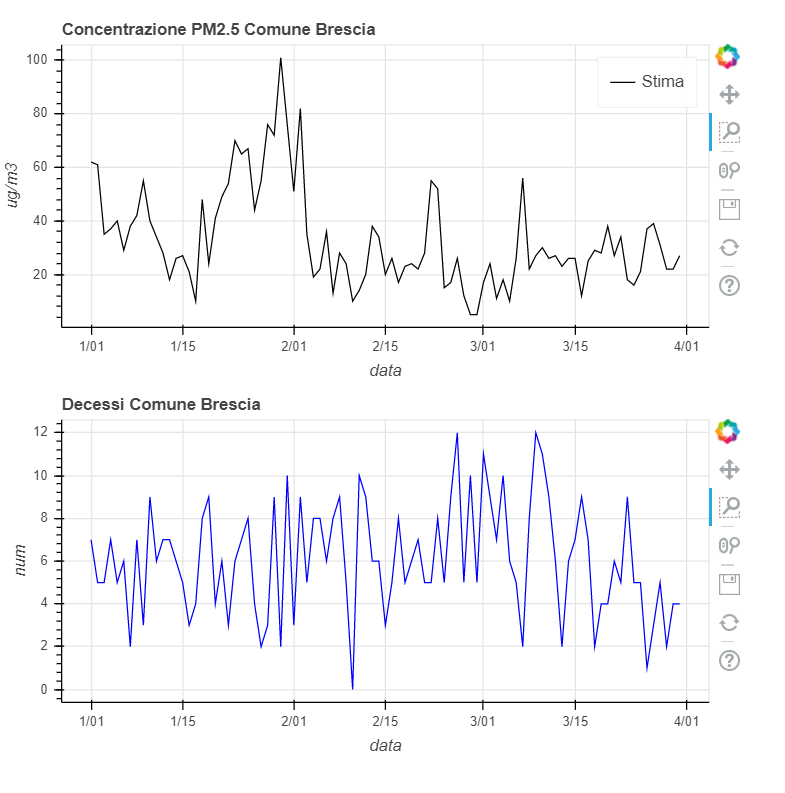

In [66]:
p=figure(plot_width=600,plot_height=300,title="Concentrazione PM2.5 Comune "+Comune, x_axis_label='data',y_axis_label='ug/m3',x_axis_type='datetime')
p.line(x,pm25_stime.Conc,line_color="black",legend='Stima')
# usa i dati dei decessi
s=figure(plot_width=600,plot_height=300,title="Decessi Comune "+Comune, x_axis_label='data',y_axis_label='num',x_axis_type='datetime')
s.line(x,decessi,line_color="blue")
show(column(p,s))

C:\Users\Mauro\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 91), ('y', 121)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


Test

In [73]:
stats.spearmanr(pm25_stime.Conc[59:70],decessi[60:71])

SpearmanrResult(correlation=-0.09132515299544462, pvalue=0.7894319152541067)

## Esito test
Il test su Milano 2016 non mostra correlazione non parametrica tra le serie.


In [40]:
from bokeh.layouts import column
from bokeh.plotting import figure

output_file("pm25.html")
x=pd.date_range('2016-01-01',periods=91,freq='D')
Comune="Milano"
p=figure(plot_width=600,plot_height=300,title="Concentrazione PM2.5 Comune "+Comune, x_axis_label='data',y_axis_label='ug/m3',x_axis_type='datetime')
p.line(x,pm25_10283.Conc,line_color="red",legend='10283')
p.line(x,pm25_17122.Conc,line_color="orange",legend='17122')
p.line(x,pm25_stime.Conc,line_color="black",legend='Stima')
# usa i dati dei decessi
s=figure(plot_width=600,plot_height=300,title="Decessi Comune "+Comune, x_axis_label='data',y_axis_label='num',x_axis_type='datetime')
s.line(x,df_tot.query('NOME_COMUNE==@Comune')['T_16'],line_color="blue")
show(column(p,s))

C:\Users\Mauro\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 91), ('y', 121)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


Controllo

In [32]:
df.query('NOME_COMUNE=="Milano"')['T_20']

46887    0.0
46888    0.0
46889    0.0
46890    0.0
46891    0.0
46892    0.0
46893    0.0
46894    0.0
46895    0.0
46896    0.0
46897    0.0
46898    0.0
46899    0.0
46900    1.0
46901    1.0
46902    0.0
46903    2.0
46904    0.0
46905    1.0
46906    0.0
46907    0.0
46908    1.0
46909    0.0
46910    0.0
46911    0.0
46912    0.0
46913    1.0
46914    0.0
46915    0.0
46916    1.0
        ... 
48605    2.0
48606    1.0
48607    1.0
48608    1.0
48609    1.0
48610    0.0
48611    1.0
48612    1.0
48613    1.0
48614    2.0
48615    4.0
48616    0.0
48617    0.0
48618    0.0
48619    0.0
48620    0.0
48621    NaN
48622    NaN
48623    NaN
48624    NaN
48625    NaN
48626    NaN
48627    NaN
48628    NaN
48629    NaN
48630    NaN
48631    NaN
48632    NaN
48633    NaN
48634    NaN
Name: T_20, Length: 1748, dtype: float64

Raggruppamento per comune e data

In [31]:
df_tot=df.groupby(['NOME_COMUNE','GE']).sum()

Controllo

Plottaggio in bokeh

![Milano](Milano.png)

In [33]:
from bokeh.plotting import figure, output_file, show
output_file("decessi.html")
x=pd.date_range('2020-01-01',periods=120,freq='D')

Codice per il plottaggio del generico comune: basta cambiare il nome e il plottaggio viene eseguito in una scheda del browser

In [34]:
Comune="Milano"
p=figure(title="Decessi Comune "+Comune, x_axis_label='data',y_axis_label='num',x_axis_type='datetime')
p.line(x,df_tot.query('NOME_COMUNE==@Comune')['T_20'],line_color="red",legend='2020')
p.line(x,df_tot.query('NOME_COMUNE==@Comune')['T_19'],line_color="blue")
p.line(x,df_tot.query('NOME_COMUNE==@Comune')['T_18'],line_color="blue")
p.line(x,df_tot.query('NOME_COMUNE==@Comune')['T_17'],line_color="blue")
p.line(x,df_tot.query('NOME_COMUNE==@Comune')['T_16'],line_color="blue")
p.line(x,df_tot.query('NOME_COMUNE==@Comune')['T_15'],line_color="blue")
show(p)


C:\Users\Mauro\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 120), ('y', 121)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
C:\Users\Mauro\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 120), ('y', 121)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
C:\Users\Mauro\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 120), ('y', 121)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
C:\Users\Mauro\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be

# Approccio statistico
L'approccio più corretto è quello probabilistico: la distribuzione è data dagli anni precedenti (T_15->T19): quanto è probabile che il dato T_20 appartenga a quella distribuzione? Infatti è ragionevole pensare che il numero di morti sia casuale ma costante in assenza di eventi. Una volta identificati questi casi per categoria d'età si può vedere se c'è correlazione con presenza di casa di cura. Sarebbe ancora più interessante vedere se c'è correlazione con RSA che hanno accettato COVID


In [148]:
from scipy import stats

Test shapiro wilks se i dati sono gaussiani, confidenza 99%.

Aggiunta condizione su max nel 2020

In [238]:
for i in df_tot.query('NOME_COMUNE=="Castiglione d\'Adda"').index:
    a=df_tot['T_15'][i],df_tot['T_16'][i],df_tot['T_17'][i],df_tot['T_18'][i],df_tot['T_19'][i],df_tot['T_20'][i]
    stat,p=stats.shapiro(a)
    M=0
    M_2020=False
    for j in a:
        if j>M:
            M=j
    if (a[5]==M):
        M_2020=True
    #M=max(a)
    if p< 0.01 and M_2020:
       print ('Non posso dire Gaussiana',i,a,p)
       
    else:
        #print ('Non posso negare che sia gaussiana',i,a,p)
        instr=0
    
    


Non posso dire Gaussiana ("Castiglione d'Adda", 103) (0, 0, 0, 0, 0, 1.0) 2.0729139578179456e-05
Non posso dire Gaussiana ("Castiglione d'Adda", 112) (1, 0, 0, 0, 0, 2.0) 0.006373272743076086
Non posso dire Gaussiana ("Castiglione d'Adda", 125) (0, 0, 0, 0, 1, 1.0) 0.0013507520779967308
Non posso dire Gaussiana ("Castiglione d'Adda", 127) (0, 0, 1, 0, 0, 1.0) 0.0013507520779967308
Non posso dire Gaussiana ("Castiglione d'Adda", 130) (0, 1, 1, 1, 0, 1.0) 0.0013507615076377988
Non posso dire Gaussiana ("Castiglione d'Adda", 204) (1, 0, 0, 0, 0, 1.0) 0.0013507520779967308
Non posso dire Gaussiana ("Castiglione d'Adda", 205) (0, 0, 0, 0, 0, 1.0) 2.0729139578179456e-05
Non posso dire Gaussiana ("Castiglione d'Adda", 220) (0, 0, 0, 0, 1, 1.0) 0.0013507520779967308
Non posso dire Gaussiana ("Castiglione d'Adda", 223) (0, 0, 0, 0, 0, 1.0) 2.0729139578179456e-05
Non posso dire Gaussiana ("Castiglione d'Adda", 228) (0, 0, 0, 1, 0, 2.0) 0.006373272743076086
Non posso dire Gaussiana ("Castiglione 

Test kwiatowski (KPSS) sulla stazionarietà della serie: nessun risultato utile

In [174]:
from statsmodels.tsa.stattools import kpss

Test anderson-darling

In [231]:
for i in df_tot.query('NOME_COMUNE=="Castiglione d\'Adda"').index:
    a=df_tot['T_15'][i],df_tot['T_16'][i],df_tot['T_17'][i],df_tot['T_18'][i],df_tot['T_19'][i],df_tot['T_20'][i]
    media=sum(a)/len(a)
    #print(max(a))
    result=stats.anderson(a)
    print(i,a)
    #print('stat=%.3f' % (result.statistic))
   # for j in range(len(result.critical_values)):
    sl, cv = result.significance_level[0], result.critical_values[0]
    if (result.statistic < cv and a[5] < media) :
            #print('Probably Gaussian at the %.1f%% level' % (sl))
            b=0
    else:
            print('Probably not Gaussian at the %.1f%% level' % (sl) )

("Castiglione d'Adda", 102) (2, 0, 0, 0, 0, 0.0)
Probably not Gaussian at the 15.0% level
("Castiglione d'Adda", 103) (0, 0, 0, 0, 0, 1.0)
Probably not Gaussian at the 15.0% level
("Castiglione d'Adda", 104) (1, 0, 0, 0, 0, 0.0)
Probably not Gaussian at the 15.0% level
("Castiglione d'Adda", 105) (1, 0, 0, 0, 2, 0.0)
Probably not Gaussian at the 15.0% level
("Castiglione d'Adda", 110) (0, 1, 0, 1, 0, 0.0)
Probably not Gaussian at the 15.0% level
("Castiglione d'Adda", 111) (2, 1, 0, 0, 0, 0.0)
Probably not Gaussian at the 15.0% level
("Castiglione d'Adda", 112) (1, 0, 0, 0, 0, 2.0)
Probably not Gaussian at the 15.0% level
("Castiglione d'Adda", 113) (2, 0, 1, 0, 0, 0.0)
Probably not Gaussian at the 15.0% level
("Castiglione d'Adda", 114) (1, 0, 0, 1, 1, 0.0)
Probably not Gaussian at the 15.0% level
("Castiglione d'Adda", 116) (1, 0, 1, 0, 0, 0.0)
Probably not Gaussian at the 15.0% level
("Castiglione d'Adda", 117) (0, 0, 1, 0, 0, 0.0)
Probably not Gaussian at the 15.0% level
("Castigli

Questa impostazione funziona bene con i comuni grossi, ma con quelli piccoli dove possono esserci giorni senza decessi la condizione di gaussianità è normalmente violata sul giorno. Andrebbe integrato il dato nel tempo.

Test: la funzione max non funziona per qualche misterioso motivo, ho quindi dovuto ricrearla. Sarebbe meglio passare a una funzione vera e propria

In [235]:
a=2, 1, 4, 2, 5, 15.0
M=0
for i in a:
    if i>M:
        M=i
print(M)
if (a[5]==M):
    print("Il massimo è nel 2020")

15.0
Il massimo è nel 2020


**FINE SEZIONE** [Torna a Home](#Introduzione) [Torna alla sezione](#Sezione7)

# References
1. Relazione tra PM2.5 e decessi<br>
    a. relazioni per esposizione prolungata<br>
    b. relazioni per esposizioni a breve termine<br>
2. Relazione PM2.5, decessi e Covid-19<br>
    a. effetto carrier<br>
    b. effetto boost per esposizione prolungata<br>
    c. effetto boost per esposizione a breve termine<br>
>**Med-particles** Il progetto ha indagato la relazione tra mortalità e morbilità a breve termine in relazione all'inquinamento >da PM2.5. Le pubblicazioni più significative sono le seguenti:<br>
>_Action10-Report_: L'incremento di mortalità per 10 ug/m3 di PM2.5 è 0.55% nelle morti per tutte le cause per stesso giorno o >giorno precedente; nel caso di morti per motivi respiratori è il 2% nei 5 giorni precedenti.<br>
>Il referente è **Massimo Stafoggia** (m.stafoggia@deplazio.it)<br>
>Equazione del modello<br>
>(vedi ref)


[Torna a Home](#Introduzione)

# Data
## Dati di mortalità giornaliera
I dati di mortalità giornalirea sono forniti da ISTAT per una serie di comuni. Sono stati estratti i dati per i comuni della lombardia nel file 
```
nomefile='comuni_Lombardia_giornaliero.txt'
```
Per la decodifica dei dati si veda il file pdf **Descrizione e tracciato record dati comunali giornalieri**


[Torna a Home](#Introduzione)